In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image 
import tables as tb

In [2]:
from SMFI_Definitions import PE_Vals
from SMFI_Definitions import Image_Converter

In [3]:
cd /Users/austinmcdonald/Desktop/SMFI-Analysis/testDATA/Spot1/

/Users/austinmcdonald/Desktop/SMFI-Analysis/testDATA/Spot1


In [4]:
####
# Go to file in the stack and grab the file names
# It is critical that they are sorted otherwise nothing will work...
####

files= [name for name in os.listdir() if name != ".DS_Store"]
files.sort()

In [5]:
TestImage = np.array(Image.open(files[0]))
TestImage[0].shape

(512,)

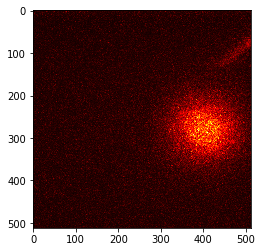

In [6]:
####
# Shows an example of what the image looks like
####
plt.imshow(TestImage, cmap='hot', interpolation='nearest')
plt.show()

(221, 221)


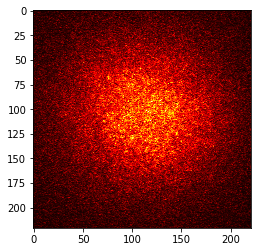

In [7]:
####
# Here we want to take an area around the spot 
# this allows for the background to have a soother shape
# which aids in fitting it. 
####
Row = int(110) # define the area to take around the spots
Col = int(110) # define the area to take around the spots
Yindex = int(285)
Xindex = int(400)

Testspot = np.array(TestImage)[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1]
plt.imshow(Testspot, cmap='hot', interpolation='nearest')
print(Testspot.shape)
plt.show()

In [8]:
#############
# Once the spot placement is correct we will defin all the paths to the slides
#############

In [9]:
SLIDE_LOC = "/Users/austinmcdonald/Desktop/SMFI-Analysis/10-12-17/Ba/"
SLIDE_PATHS = [f.path for f in os.scandir(SLIDE_LOC) if f.is_dir() ] 
SLIDE_PATHS

['/Users/austinmcdonald/Desktop/SMFI-Analysis/10-12-17/Ba/Slide1',
 '/Users/austinmcdonald/Desktop/SMFI-Analysis/10-12-17/Ba/Slide3',
 '/Users/austinmcdonald/Desktop/SMFI-Analysis/10-12-17/Ba/Slide2']

In [10]:
#############
# not it goes through each slide and each spot nested there in
# This will produce one h5 file tfor each spot that contains the croped and converted spots. 
#############
# This step is the longest and can take a few minuets
#############

In [11]:
for SLIDE in SLIDE_PATHS:
    Slide_Name = SLIDE.split("/")[-1]
    print("Working on slide "+Slide_Name)
    SPOT_PATH = [f.path for f in os.scandir(SLIDE) if f.is_dir() ]
    for SPOT in SPOT_PATH:
        Spot_Name = SPOT.split("/")[-1]
        print("Working on spot "+Spot_Name)
        File_Name = Slide_Name+"_"+Spot_Name+".h5"
        FRAMES = [f.path for f in os.scandir(SPOT) if f != ".DS_Store"]
        FRAMES.sort()
        
        SLIDE_LOC
        H5_FILE = SLIDE_LOC+File_Name
        if os.path.exists(H5_FILE):
            os.remove(H5_FILE)
        
        counter = 0
        with tb.open_file(H5_FILE, mode="w", title="test") as test:
            GroupName = "ImageStack"
            GroupT  = test.create_group("/", GroupName)
            for FRAME in FRAMES:
                eOffset, eCoeff = PE_Vals(FRAME)
                ReducedImage = Image_Converter(FRAME,eOffset,eCoeff,Xindex,Yindex,Row,Col)

                ArrayName = "Frame_"+str(counter).zfill(4)
                test.create_array(GroupT, ArrayName, ReducedImage)
                test.flush()
                counter+=1
            test.close()

Working on slide Slide1
Working on spot Spot4
Working on spot Spot3
Working on spot Spot2
Working on spot Spot5
Working on spot Spot6
Working on spot Spot1
Working on slide Slide3
Working on spot Spot4
Working on spot Spot3
Working on spot Spot2
Working on spot Spot5
Working on spot Spot1
Working on slide Slide2
Working on spot Spot4
Working on spot Spot3
Working on spot Spot2
Working on spot Spot5
Working on spot Spot6
Working on spot Spot1
